# Assignment I: Credit Card Fraud Detection 

## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.





In [ ]:
#from zipfile import ZipFile
#zip = ZipFile('creditcard.csv.zip')
#zip.extractall()

#download data
#!unzip creditcard.csv.zip

## Task 1: Problem Statement
Discuss the problem setting and the first implecations of the given data set... 

#### What assumptions can we make about the data?
1. Largest enough Sample
2. Normal day of transactions without exceptional leakage that would result in more fraudulant data such as password leakage
3. All variables are independent of one another and no variable is extrapulated from another
4. The company is more concerned about decreasing the False-Negatives, as the company's reputation with customers would be dependent on it.

#### What problems are we expecting?

1. Since there is confidental data we miss out of the label of headers which causes less context to the included columns
2. Highly unbalanced data making selecting feature difficult as it likely split on a certain feature will result still unresolved split


# Task 2: First Data Analysis and Cleaning
* Import the data to a Pandas DataFrame
* Run first simple statistics and visualizations
* Is there a need to clean the data? If yes, do so...

see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support

A = pd.read_csv('creditcard.csv')

In [3]:
A.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
A.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

A['scaled_amount'] = rob_scaler.fit_transform(A['Amount'].values.reshape(-1,1))
A['scaled_time'] = rob_scaler.fit_transform(A['Time'].values.reshape(-1,1))

A.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = A['scaled_amount']
scaled_time = A['scaled_time']

A.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
A.insert(0, 'scaled_amount', scaled_amount)
A.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

A.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


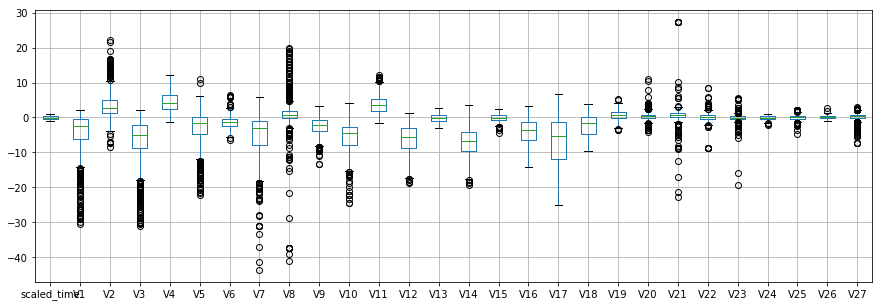

In [6]:
#Boxplot for only Frauds
A[A['Class']== 1].iloc[:,1:29].boxplot(figsize=(15,5))


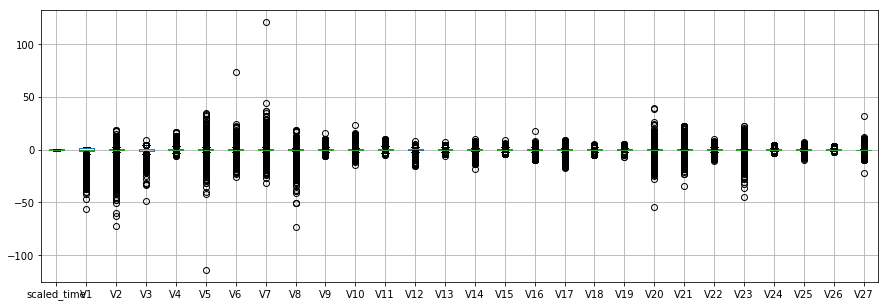

In [7]:
#Boxploy for only Non-Fruads
A[A['Class']== 0].iloc[:,1:29].boxplot(figsize=(15,5))

# Task 3: Dataset Preparation + Validation
#### Should we pepare a validation set? Or use other approaches? -> do so.
  Since the data is highly impbalanced we need to ensure that the training and test datasets are porportional 
  
#### How should we meassure the quality of our model?
  Quality of the model should be evaulated by Recall as it is more important to the company according to our assumptions that we reduce FN which would increase the Recall measure

In [8]:
# Split Test and Train to proportional sets per Class labels
X = A.drop('Class', axis=1)
y = A['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

Xtrain = Xtrain.values
Xtest = Xtest.values
ytrain = ytrain.values
ytest = ytest.values

train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)


print('Label Distributions: \n')
print(train_counts_label/ len(ytrain))
print(test_counts_label/ len(ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


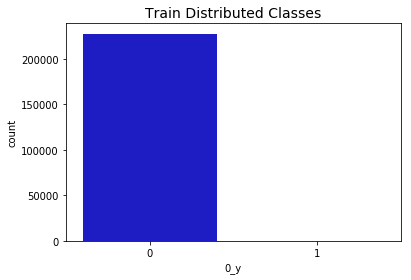

In [9]:
TrainDataset = pd.DataFrame(Xtrain)
TrainDataset = TrainDataset.merge(pd.DataFrame(ytrain),left_index=True, right_index=True)


sns.countplot('0_y', data=TrainDataset, palette=["#0101DF", "#DF0101"])
plt.title('Train Distributed Classes', fontsize=14)
plt.show()

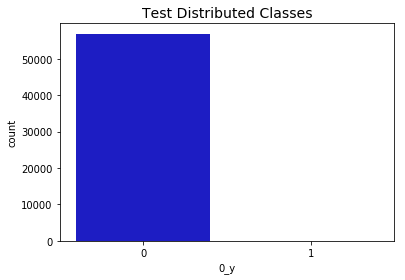

In [10]:
TestDataset = pd.DataFrame(Xtest)
TestDataset = TestDataset.merge(pd.DataFrame(ytest),left_index=True, right_index=True)


sns.countplot('0_y', data=TestDataset, palette=["#0101DF", "#DF0101"])
plt.title('Test Distributed Classes', fontsize=14)
plt.show()


# Task 4: Train a Gaussian Naive Bayes Classifier
* Train and evaluate the model using the approach from task 3
* Diskuss the results -> possible improovements?

See: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB


In [11]:
#Proportional Splits, the recall is good but the overall precision and F-1 score are poor. 
clf = GaussianNB()
clf.fit(Xtrain, ytrain)
predictTestLabel = clf.predict(Xtest)
print(accuracy_score(ytest, predictTestLabel))
print(precision_recall_fscore_support(ytest, predictTestLabel, labels=['1','0']))

0.9810747704569793
(array([0.06790123, 0.99962384]), array([0.78571429, 0.98141146]), array([0.125     , 0.99043393]), array([   98, 56863], dtype=int64))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\arraysetops.py:468: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Though our recall is not bad at 78.6% for fruad detection, however precision is very bad at only ~7%. Though this was not our top concern as our assumption is the company would rather focus on high recall as over estimating would have only postive benefits in terms of client trust. The Recall overall considering what is stake might be not acceptable enough for the company and innodating customers with too message might annoy customers. 

*Possible improvements:*

1) Try other algothrims such as a Neural Network,Random Forest with a dimensional reduction 

2) Change the training set to have instead of proportional split a 50/50 split between Fraud/Non-Fraud to help the Classifer more easily distinguish differences between the two. 

3) Though we used a Robust Scalar on Time and Amount, the other V1 - V28 Variables do appear to still have outliers even when looking at classes sperately, we could do some more work interms of cleaning per class.